<a href="https://colab.research.google.com/github/andyw23/test_data/blob/master/Intro_to_data_science_in_python_Mod_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to data science in python: Mod 1

##Linear regression

![linear regression](https://docs.google.com/uc?export=download&id=1Do1ODdHR1Y3qk98IJhhWKqDzQSXZO2WJ)


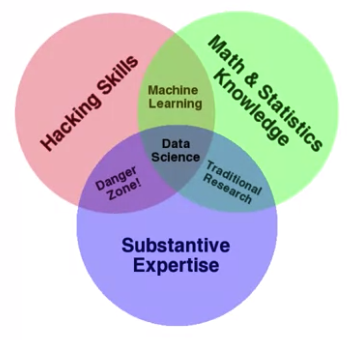

##Examples

###Import CSV

In [0]:
import csv

%precision 2

with open('mpg.csv') as csvfile:
    mpg = list(csv.DictReader(csvfile))
    
mpg[:3] # The first three dictionaries in our list.

In [0]:
import pandas as pd

df = pd.read_csv('olympics.csv', index_col = 0, skiprows=1)
df.head()

###Arrays

In [0]:
[i*j for i in range(10) for j in range(10)]

In [0]:
people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson', 'Dr. VG Vinod Vydiswaran', 'Dr. Daniel Romero']

#option 1
for person in people:
    print((lambda x: x.split()[0] + ' ' + x.split()[-1])(person))

list(map(lambda x: x.split()[0] + ' ' + x.split()[-1], people))

In [0]:
import numpy as np

np.diag(np.ones(5))

In [0]:
import numpy as np

x = np.arange(36)
x.resize(6,6)
x.reshape(36)[::7]
x[::7]
x[2:4,2:4]

##Assignment 2

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [14]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/file/d/1qcJ0NalrCVxypchZxdHVYkhqI4FKlBua', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

ParserError: ignored

### Question 1
Which country has won the most gold medals in summer games?

*This function should return a single string value.*

In [0]:
def answer_one():
    return df[df['Gold']==df['Gold'].max()].index.format()[0]

answer_one()

### Question 2
Which country had the biggest difference between their summer and winter gold medal counts?

*This function should return a single string value.*

In [0]:
def answer_two():
    df['delta'] = abs(df['Gold.1'].sub(df['Gold'], axis = 0))
    return df[df['delta']==df['delta'].max()].index.format()[0]

answer_two()

### Question 3
Which country has the biggest difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count? 

$$\frac{Summer~Gold - Winter~Gold}{Total~Gold}$$

Only include countries that have won at least 1 gold in both summer and winter.

*This function should return a single string value.*

In [0]:
def answer_three():
    new_df = df.loc[(df['Gold']>0) & (df['Gold.1']>0)]
    new_df['delta'] = (new_df['Gold'].sub(new_df['Gold.1'], axis = 0)) / new_df['Gold.2']
    new_df = new_df.sort('delta', ascending=False)
    return new_df[new_df['delta']==new_df['delta'].max()].index.format()[0]

answer_three()

### Question 4
Write a function that creates a Series called "Points" which is a weighted value where each gold medal (`Gold.2`) counts for 3 points, silver medals (`Silver.2`) for 2 points, and bronze medals (`Bronze.2`) for 1 point. The function should return only the column (a Series object) which you created, with the country names as indices.

*This function should return a Series named `Points` of length 146*

In [0]:
def answer_four():
    df['Points'] = df['Gold.2']*3 + df['Silver.2']*2 + df['Bronze.2']
    return df['Points']

answer_four()

## Part 2
For the next set of questions, we will be using census data from the [United States Census Bureau](http://www.census.gov). Counties are political and geographic subdivisions of states in the United States. This dataset contains population data for counties and states in the US from 2010 to 2015. [See this document](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/co-est2015-alldata.pdf) for a description of the variable names.

The census dataset (census.csv) should be loaded as census_df. Answer questions using this as appropriate.

In [0]:
census_df = pd.read_csv('census.csv')
census_df.head()

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/andyw23/test_data/master/michigan/census.csv?token=AA4W2DYSUJDPLAF4AVZJ3SS6V2KJM'
census_df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,4801108,4816089,4830533,4846411,4858979,5034,15947,14981,14444,15878,12568,14226,59689,59062,57938,58334,58305,11089,48811,48357,50843,50228,50330,3137,10878,10705,7095,8106,7975,1357,...,677,-573,1135,116185,116212,115560,115666,116963,119088,119599,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556,2.269496,2.226220,1.470981,1.675322,1.643417,1.027720,1.019840,1.002216,1.142716,1.179963,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


### Question 5
Which state has the most counties in it? (hint: consider the sumlevel key carefully! You'll need this for future questions too...)

*This function should return a single string value.*

In [5]:
def answer_five():
    df = census_df.copy()
    df['STNAME'] = df['STNAME'].astype('category')
    df2 = df[df['SUMLEV'] == 50].groupby(['STNAME']).size().reset_index(name='NUM_COUNTIES').sort_values('NUM_COUNTIES',ascending=False)
    return df2.sort_values('NUM_COUNTIES',ascending=False)['STNAME'].iloc[0]

answer_five()

'Texas'

### Question 6
**Only looking at the three most populous counties for each state**, what are the three most populous states (in order of highest population to lowest population)? Use `CENSUS2010POP`.

*This function should return a list of string values.*

In [6]:
def answer_six():
    df = census_df.set_index(['STNAME', 'CTYNAME'])
    df = df.where(df['SUMLEV']==50)
    return list (df.groupby(level=0)['CENSUS2010POP'].nlargest(3).sum(level=0).nlargest(3).index)

answer_six()

['California', 'Texas', 'Illinois']

### Question 7
Which county has had the largest absolute change in population within the period 2010-2015? (Hint: population values are stored in columns POPESTIMATE2010 through POPESTIMATE2015, you need to consider all six columns.)

e.g. If County Population in the 5 year period is 100, 120, 80, 105, 100, 130, then its largest change in the period would be |130-80| = 50.

*This function should return a single string value.*

In [7]:
import numpy as np

def answer_seven():
    #s.max(level='blooded')
    df = census_df.filter(['CTYNAME','SUMLEV','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015'], axis=1)
    df = df.where(df['SUMLEV']==50)
    df = df.drop('SUMLEV', axis=1)
    df['DELTA'] = abs(df.max(axis=1)-df.min(axis=1))
    df = df.filter(['CTYNAME','DELTA'], axis=1).sort_values(by='DELTA',ascending=False)
    return df.iloc[0][0]

answer_seven()

'Harris County'

### Question 8
In this datafile, the United States is broken up into four regions using the "REGION" column. 

Create a query that finds the counties that belong to regions 1 or 2, whose name starts with 'Washington', and whose POPESTIMATE2015 was greater than their POPESTIMATE 2014.

*This function should return a 5x2 DataFrame with the columns = ['STNAME', 'CTYNAME'] and the same index ID as the census_df (sorted ascending by index).*

In [8]:
def answer_eight():
    df = census_df.copy()
    df = df.loc[(df['REGION']==1) | (df['REGION']==2)]
    df = df.loc[(df['POPESTIMATE2015']>df['POPESTIMATE2014'])]
    df = df.loc[df['CTYNAME'].str.contains('Washington', na=False)]
    return df.filter(['STNAME', 'CTYNAME'])

answer_eight()

,STNAME,CTYNAME
896,Iowa,Washington County
1419,Minnesota,Washington County
2345,Pennsylvania,Washington County
2355,Rhode Island,Washington County
3163,Wisconsin,Washington County


##Idiomatic Pandas: Making Code Pandorable

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/andyw23/test_data/master/michigan/census.csv'
census_df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
census_df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,INTERNATIONALMIG2010,...,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,GQESTIMATESBASE2010,GQESTIMATES2010,GQESTIMATES2011,GQESTIMATES2012,GQESTIMATES2013,GQESTIMATES2014,GQESTIMATES2015,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,4801108,4816089,4830533,4846411,4858979,5034,15947,14981,14444,15878,12568,14226,59689,59062,57938,58334,58305,11089,48811,48357,50843,50228,50330,3137,10878,10705,7095,8106,7975,1357,...,677,-573,1135,116185,116212,115560,115666,116963,119088,119599,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556,2.269496,2.226220,1.470981,1.675322,1.643417,1.027720,1.019840,1.002216,1.142716,1.179963,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,55253,55175,55038,55290,55347,89,593,-78,-137,252,57,151,636,615,574,623,600,152,507,558,583,504,467,-1,129,57,-9,119,133,33,...,22,-10,45,455,455,455,455,455,455,455,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022,2.347311,1.032347,-0.163320,2.157204,2.404259,0.363924,0.289782,0.290347,0.326300,0.343466,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,186659,190396,195126,199713,203709,928,3466,3737,4730,4587,3996,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992,-15,362,213,258,142,248,69,...,91,434,58,2307,2307,2307,2249,2304,2308,2309,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515,1.957540,1.129809,1.338445,0.719281,1.229482,1.011215,0.912334,0.881921,1.073855,1.095627,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,27226,27159,26973,26815,26489,-116,-115,-67,-186,-158,-326,70,335,300,283,260,269,128,319,291,294,310,309,-58,16,9,-11,-50,-40,2,...,19,-1,-5,3193,3193,3382,3388,3389,3353,3352,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877,0.586435,0.330974,-0.406414,-1.859151,-1.500825,-0.146609,-0.257424,-0.110840,-0.074366,0.000000,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,22733,22642,22512,22549,22583,-58,-128,-91,-130,37,34,44,266,245,259,247,253,34,278,237,281,211,223,10,-12,8,-22,36,30,2,...,14,-16,-21,2224,2224,2224,2224,2224,2233,2236,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124,-0.526385,0.352617,-0.974443,1.597834,1.329434,0.438654,0.705234,0.797272,0.932070,0.930604,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [0]:
df = census_df.copy()
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}))

In [0]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

##Apply

In [0]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [10]:
df = census_df.copy()
df.apply(min_max, axis=1)

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
...,...,...
3188,43593,45162
3189,21297,23125
3190,20822,21102
3191,8316,8545


In [0]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

In [0]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

##Group by

In [0]:
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/andyw23/test_data/master/michigan/census.csv'
df = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df = df[df['SUMLEV']==50]
df.head()

In [0]:
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state ' + state + ' have an average population of ' + str(avg))

In [0]:
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))

In [0]:
df.head()

In [0]:
df2 = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df2.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

In [0]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [0]:
(df.groupby('STNAME')
  .agg({'CENSUS2010POP': np.average})
  .round(0)
  .head(5))

In [0]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

In [0]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

In [0]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

In [0]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

# Scales

In [0]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

In [102]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [0]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

In [0]:
grades > 'C'

# Pivot Tables

In [0]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('https://www.nrcan.gc.ca/sites/www.nrcan.gc.ca/files/oee/files/csv/MY2020%20Fuel%20Consumption%20Ratings.csv', encoding='latin_1', header=0)
df = (df[df.columns[:15]]
  .dropna())
df.columns=['Year','Make','Model','Vehicle Class','Engine Size','Cylinders','Transmission','Fuel','City L/100km','Hway L/100km','Comb L/100km','Comb mpg','CO2 g/km', 'CO2 Rating','Smog Rating']
df.head(5)

In [0]:
df.pivot_table(values='Comb mpg', index='Year', columns='Make', aggfunc=np.mean).transpose().head(20)

##Misc

In [0]:
print (df.drop(df[df['Quantity'] == 0].index)
     .rename(columns={'Weight': 'Weight (oz.)'})
     .head()) 

In [0]:
print(df.groupby('Category').apply(lambda df,a,b: sum(df[a] * df[b]), 'Weight (oz.)', 'Quantity'))

###cut

In [0]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])

pd.cut(s,3,labels=['lo','med','hi'])

In [0]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

In [0]:
pd.
